# Prepare

In [1]:
# import necessaries
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import tushare as ts
from datetime import datetime, timedelta
pro = ts.pro_api()
pd.set_option('display.max_rows', 1000)
# set plot conf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
DAYS_BEFORE = 300

In [3]:
def draw_pic(data, title_name):
    plt.figure(figsize=(15,8))
    plt.plot(data)
    plt.title(title_name)
    plt.show()

# Get Option Info

In [4]:
option_info_all = pro.opt_basic(
    exchange='SSE',
    call_put='C',
    fields='ts_code,name,exercise_price, list_date,delist_date,maturity_date')
# for i in {'maturity_date', 'list_date', 'delist_date'}:
#     option_info_all[i] = pd.to_datetime(option_info_all[i])

option_info_all['period']=pd.to_datetime(option_info_all['delist_date']) - pd.to_datetime(option_info_all['list_date'])
option_info_all

,ts_code,name,exercise_price,maturity_date,list_date,delist_date,period
0,10000869.SH,华夏上证50ETF期权1705认购2.25,2.250,20170524,20170323,20170524,62 days
1,10000870.SH,华夏上证50ETF期权1705认购2.30,2.300,20170524,20170323,20170524,62 days
2,10000871.SH,华夏上证50ETF期权1705认购2.35,2.350,20170524,20170323,20170524,62 days
3,10000872.SH,华夏上证50ETF期权1705认购2.40,2.400,20170524,20170323,20170524,62 days
4,10000873.SH,华夏上证50ETF期权1705认购2.45,2.450,20170524,20170323,20170524,62 days
5,10000879.SH,华夏上证50ETF期权1705认购2.50,2.500,20170524,20170406,20170524,48 days
6,10001253.SH,华夏上证50ETF期权1804认购2.95,2.950,20180425,20180301,20180425,55 days
7,10001254.SH,华夏上证50ETF期权1804认购3.00,3.000,20180425,20180301,20180425,55 days
8,10001255.SH,华夏上证50ETF期权1804认购3.10,3.100,20180425,20180301,20180425,55 days
9,10001179.SH,华夏上证50ETF期权1801认购3.30,3.300,20180124,20180108,20180124,16 days


In [5]:
option_info_all[option_info_all['maturity_date'].str.startswith('201803')]

,ts_code,name,exercise_price,maturity_date,list_date,delist_date,period
11,10001183.SH,华夏上证50ETF期权1803认购3.30,3.300,20180328,20180108,20180328,79 days
50,10001047.SH,华夏上证50ETF期权1803认购2.946,2.946,20180328,20171108,20180328,140 days
225,10001163.SH,华夏上证50ETF期权1803认购2.65,2.650,20180328,20180102,20180328,85 days
226,10001164.SH,华夏上证50ETF期权1803认购3.10,3.100,20180328,20180102,20180328,85 days
234,10000987.SH,华夏上证50ETF期权1803认购2.504,2.504,20180328,20170807,20180328,233 days
239,10001191.SH,华夏上证50ETF期权1803认购3.40,3.400,20180328,20180111,20180328,76 days
248,10001063.SH,华夏上证50ETF期权1803认购3.142,3.142,20180328,20171120,20180328,128 days
263,10000969.SH,华夏上证50ETF期权1803认购2.553,2.553,20180328,20170727,20180328,244 days
264,10000970.SH,华夏上证50ETF期权1803认购2.602,2.602,20180328,20170727,20180328,244 days
265,10000971.SH,华夏上证50ETF期权1803认购2.651,2.651,20180328,20170727,20180328,244 days


In [6]:
option_info_all[option_info_all['maturity_date'].str.startswith('201709')]

,ts_code,name,exercise_price,maturity_date,list_date,delist_date,period
39,10000855.SH,华夏上证50ETF期权1709认购2.50,2.50,20170927,20170214,20170927,225 days
43,10000844.SH,华夏上证50ETF期权1709认购2.30,2.30,20170927,20170126,20170927,244 days
44,10000845.SH,华夏上证50ETF期权1709认购2.35,2.35,20170927,20170126,20170927,244 days
45,10000846.SH,华夏上证50ETF期权1709认购2.40,2.40,20170927,20170126,20170927,244 days
46,10000847.SH,华夏上证50ETF期权1709认购2.45,2.45,20170927,20170126,20170927,244 days
47,10000843.SH,华夏上证50ETF期权1709认购2.25,2.25,20170927,20170126,20170927,244 days
219,10000949.SH,华夏上证50ETF期权1709认购2.70,2.70,20170927,20170711,20170927,78 days
224,10000885.SH,华夏上证50ETF期权1709认购2.20,2.20,20170927,20170420,20170927,160 days
235,10000929.SH,华夏上证50ETF期权1709认购2.65,2.65,20170927,20170626,20170927,93 days
241,10000921.SH,华夏上证50ETF期权1709认购2.60,2.60,20170927,20170601,20170927,118 days


In [7]:
def get_option_info(key_words_list):
    temp = option_info_all.copy()
    for i in key_words_list:
        temp = temp[temp['name'].str.contains(i)]
    return temp

key_words = ['1709','2.30']
option_info = get_option_info(key_words)
option_info

,ts_code,name,exercise_price,maturity_date,list_date,delist_date,period
43,10000844.SH,华夏上证50ETF期权1709认购2.30,2.3,20170927,20170126,20170927,244 days


In [8]:
def get_opiton_code(key_words_list):
    return str(get_option_info(key_words_list)['ts_code'].values[0])
option_code = get_opiton_code(key_words)
option_code

'10000844.SH'

In [9]:
def get_date_info(option_info):
    begin_date = str(option_info['list_date'].values[0])
    end_date = str(option_info['delist_date'].values[0])
    before_begin_date = datetime.strftime(datetime.strptime(begin_date,'%Y%m%d') - timedelta(days = DAYS_BEFORE), '%Y%m%d')
    return begin_date, end_date, before_begin_date
begin_date, end_date, before_begin_date = get_date_info(option_info)
print(begin_date, end_date, before_begin_date)

('20170126', '20170927', '20160401')


# Get Option Trade Data

In [10]:
def col_to_date_and_as_index(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name])
    df.index = df[col_name]



def get_option_trade_data(option_code):
    pro = ts.pro_api()
    option_trade = pro.opt_daily(ts_code=option_code)
    col_to_date_and_as_index(option_trade, 'trade_date')
    return option_trade.sort_index()


option_trade = get_option_trade_data(option_code)
option_trade

,ts_code,trade_date,exchange,pre_settle,pre_close,open,high,low,close,settle,vol,amount,oi
trade_date,,,,,,,,,,,,,
2017-01-26,10000844.SH,2017-01-26,SSE,0.1444,0.1444,0.1466,0.1507,0.1433,0.1433,0.1433,0.0452,668428.0,282.0
2017-02-03,10000844.SH,2017-02-03,SSE,0.1433,0.1433,0.1551,0.1551,0.1345,0.1345,0.1329,0.0241,336803.0,409.0
2017-02-06,10000844.SH,2017-02-06,SSE,0.1329,0.1345,0.1370,0.1375,0.1300,0.1309,0.1309,0.0154,206637.0,472.0
2017-02-07,10000844.SH,2017-02-07,SSE,0.1309,0.1309,0.1315,0.1320,0.1218,0.1236,0.1236,0.0200,255586.0,559.0
2017-02-08,10000844.SH,2017-02-08,SSE,0.1236,0.1236,0.1219,0.1286,0.1148,0.1280,0.1287,0.0522,624557.0,780.0
2017-02-09,10000844.SH,2017-02-09,SSE,0.1287,0.1280,0.1282,0.1417,0.1282,0.1368,0.1371,0.0374,515346.0,766.0
2017-02-10,10000844.SH,2017-02-10,SSE,0.1371,0.1368,0.1396,0.1468,0.1375,0.1421,0.1424,0.0324,463567.0,783.0
2017-02-13,10000844.SH,2017-02-13,SSE,0.1424,0.1421,0.1460,0.1494,0.1415,0.1427,0.1418,0.0271,393611.0,861.0
2017-02-14,10000844.SH,2017-02-14,SSE,0.1418,0.1427,0.1469,0.1469,0.1343,0.1353,0.1360,0.0248,339012.0,893.0


## have a look

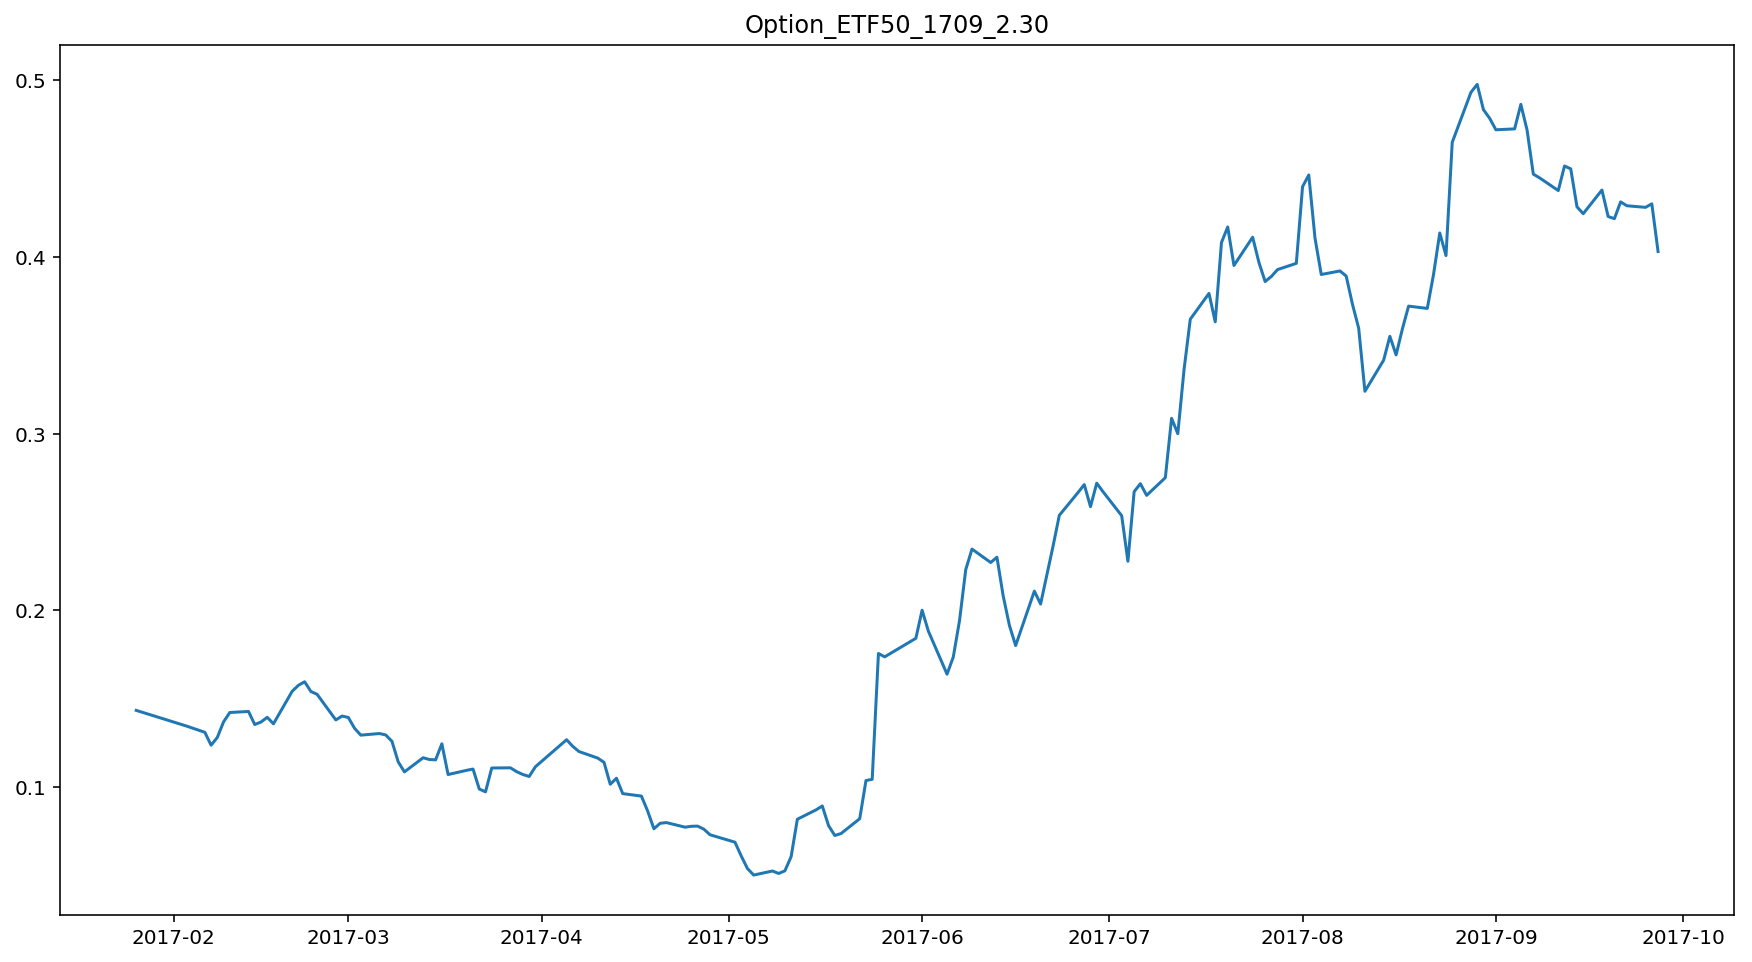

In [11]:
draw_pic(option_trade.close, "Option_ETF50_1709_2.30")

# Get Underlying Asset (ETF50 Fund) Trade Data

In [12]:
def get_underlying_asset_trade_data():
    pro = ts.pro_api()
    data = pro.fund_daily(ts_code='510050.SH', start_date=before_begin_date, end_date=end_date)
    col_to_date_and_as_index(data, 'trade_date')
    return data.sort_index()

underlying_asset_trade = get_underlying_asset_trade_data()
underlying_asset_trade

,ts_code,trade_date,pre_close,open,high,low,close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2016-04-01,510050.SH,2016-04-01,2.156,2.152,2.166,2.116,2.165,0.009,0.4174,3467697.46,745360.354
2016-04-05,510050.SH,2016-04-05,2.165,2.152,2.189,2.146,2.175,0.010,0.4619,4033006.88,876822.489
2016-04-06,510050.SH,2016-04-06,2.175,2.168,2.175,2.157,2.165,-0.010,-0.4598,2193315.55,475108.314
2016-04-07,510050.SH,2016-04-07,2.165,2.170,2.177,2.136,2.139,-0.026,-1.2009,2350029.20,505503.939
2016-04-08,510050.SH,2016-04-08,2.139,2.128,2.134,2.112,2.124,-0.015,-0.7013,2713618.24,576541.114
2016-04-11,510050.SH,2016-04-11,2.124,2.139,2.166,2.139,2.144,0.020,0.9416,2882288.54,620823.119
2016-04-12,510050.SH,2016-04-12,2.144,2.144,2.149,2.133,2.142,-0.002,-0.0933,1774047.65,379581.451
2016-04-13,510050.SH,2016-04-13,2.142,2.154,2.197,2.154,2.168,0.026,1.2138,5480353.17,1195900.106
2016-04-14,510050.SH,2016-04-14,2.168,2.179,2.190,2.164,2.174,0.006,0.2768,3061830.70,666019.637


## have a look

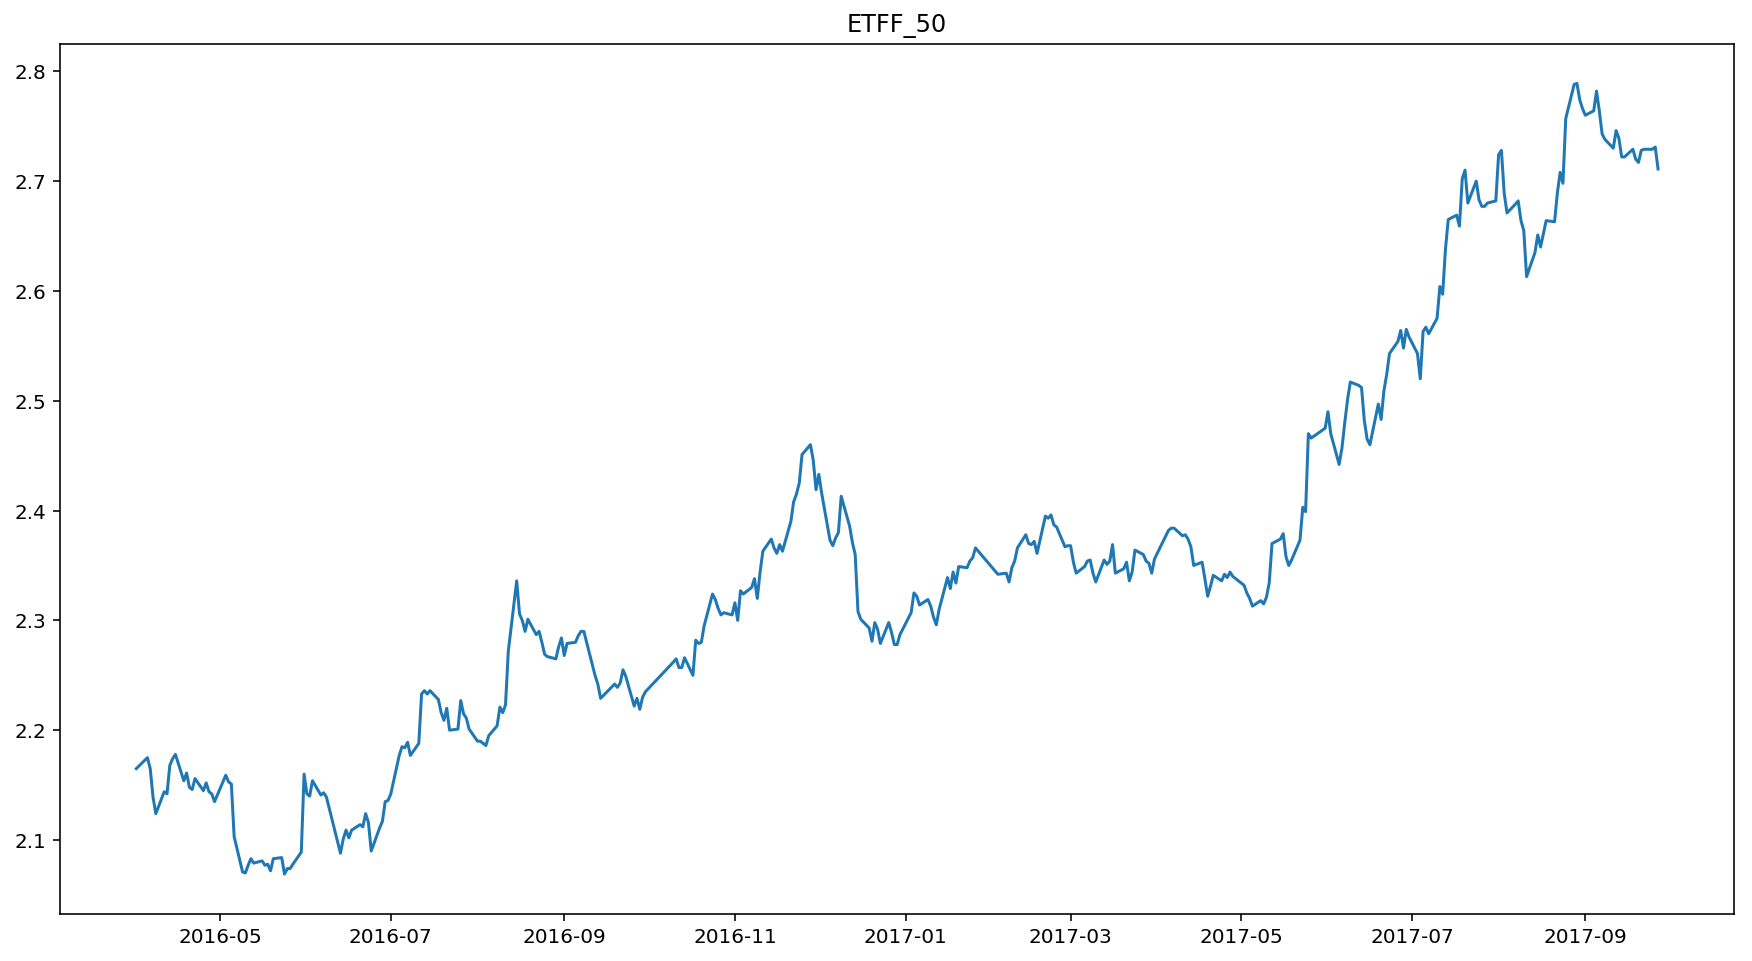

In [13]:
draw_pic(underlying_asset_trade['close'], 'ETFF_50')

### get image for ppt

In [38]:
data = pro.fund_daily(ts_code='510050.SH', start_date='20170101', end_date='20190101')
col_to_date_and_as_index(data, 'trade_date')


Text(0.5,1,'ETF50_Close_Daily')

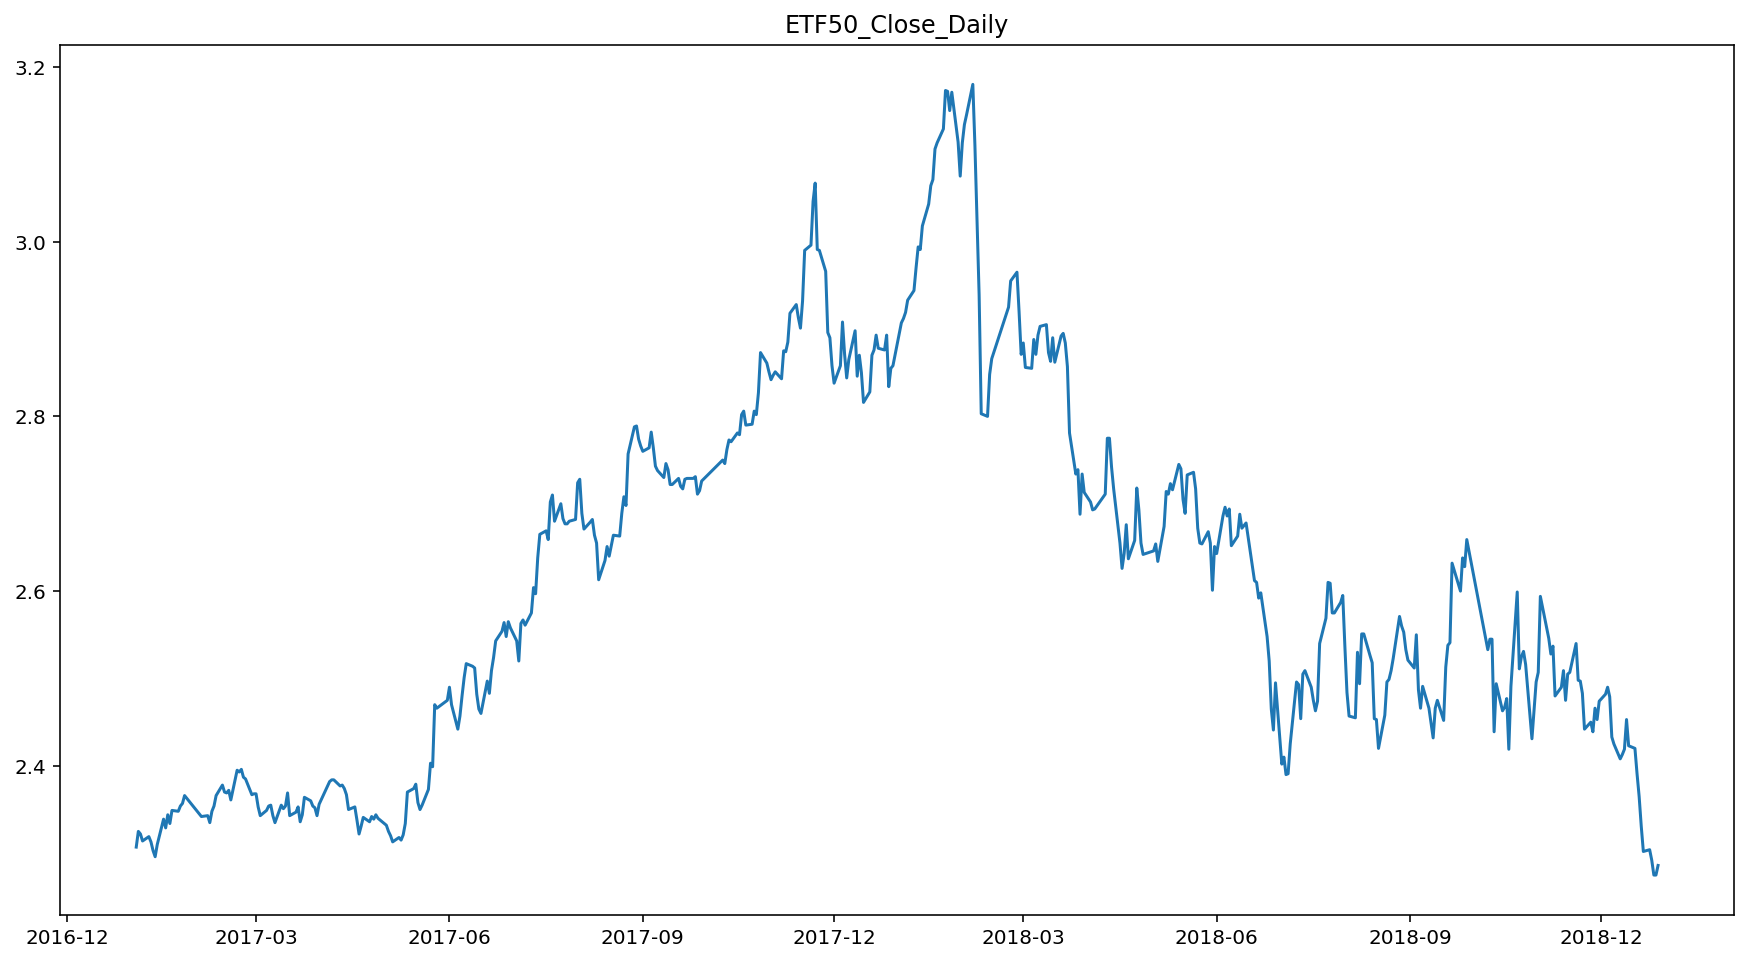

In [39]:
plt.figure(figsize=(15,8))
plt.plot(data['close'])
plt.title('ETF50_Close_Daily')

# Calculate the Volatility

In [16]:
def history_volatility(price_series, periods):
    volatility = pd.DataFrame(index = price_series.index)
    volatility['log_return'] = np.log(price_series) - np.log(price_series).shift(1)
    volatility['std'] = price_series.rolling(window=periods).std(ddof=1) * np.sqrt(250) / np.sqrt(periods)
    return volatility['std']

history_volatility_30 = history_volatility(underlying_asset_trade['close'], 30)
history_volatility_30

trade_date
2016-04-01         NaN
2016-04-05         NaN
2016-04-06         NaN
2016-04-07         NaN
2016-04-08         NaN
2016-04-11         NaN
2016-04-12         NaN
2016-04-13         NaN
2016-04-14         NaN
2016-04-15         NaN
2016-04-18         NaN
2016-04-19         NaN
2016-04-20         NaN
2016-04-21         NaN
2016-04-22         NaN
2016-04-25         NaN
2016-04-26         NaN
2016-04-27         NaN
2016-04-28         NaN
2016-04-29         NaN
2016-05-03         NaN
2016-05-04         NaN
2016-05-05         NaN
2016-05-06         NaN
2016-05-09         NaN
2016-05-10         NaN
2016-05-11         NaN
2016-05-12         NaN
2016-05-13         NaN
2016-05-16    0.097373
2016-05-17    0.100860
2016-05-18    0.102255
2016-05-19    0.104814
2016-05-20    0.107083
2016-05-23    0.109243
2016-05-24    0.112339
2016-05-25    0.114413
2016-05-26    0.113544
2016-05-27    0.110632
2016-05-30    0.105323
2016-05-31    0.106094
2016-06-01    0.103909
2016-06-02    0.103133


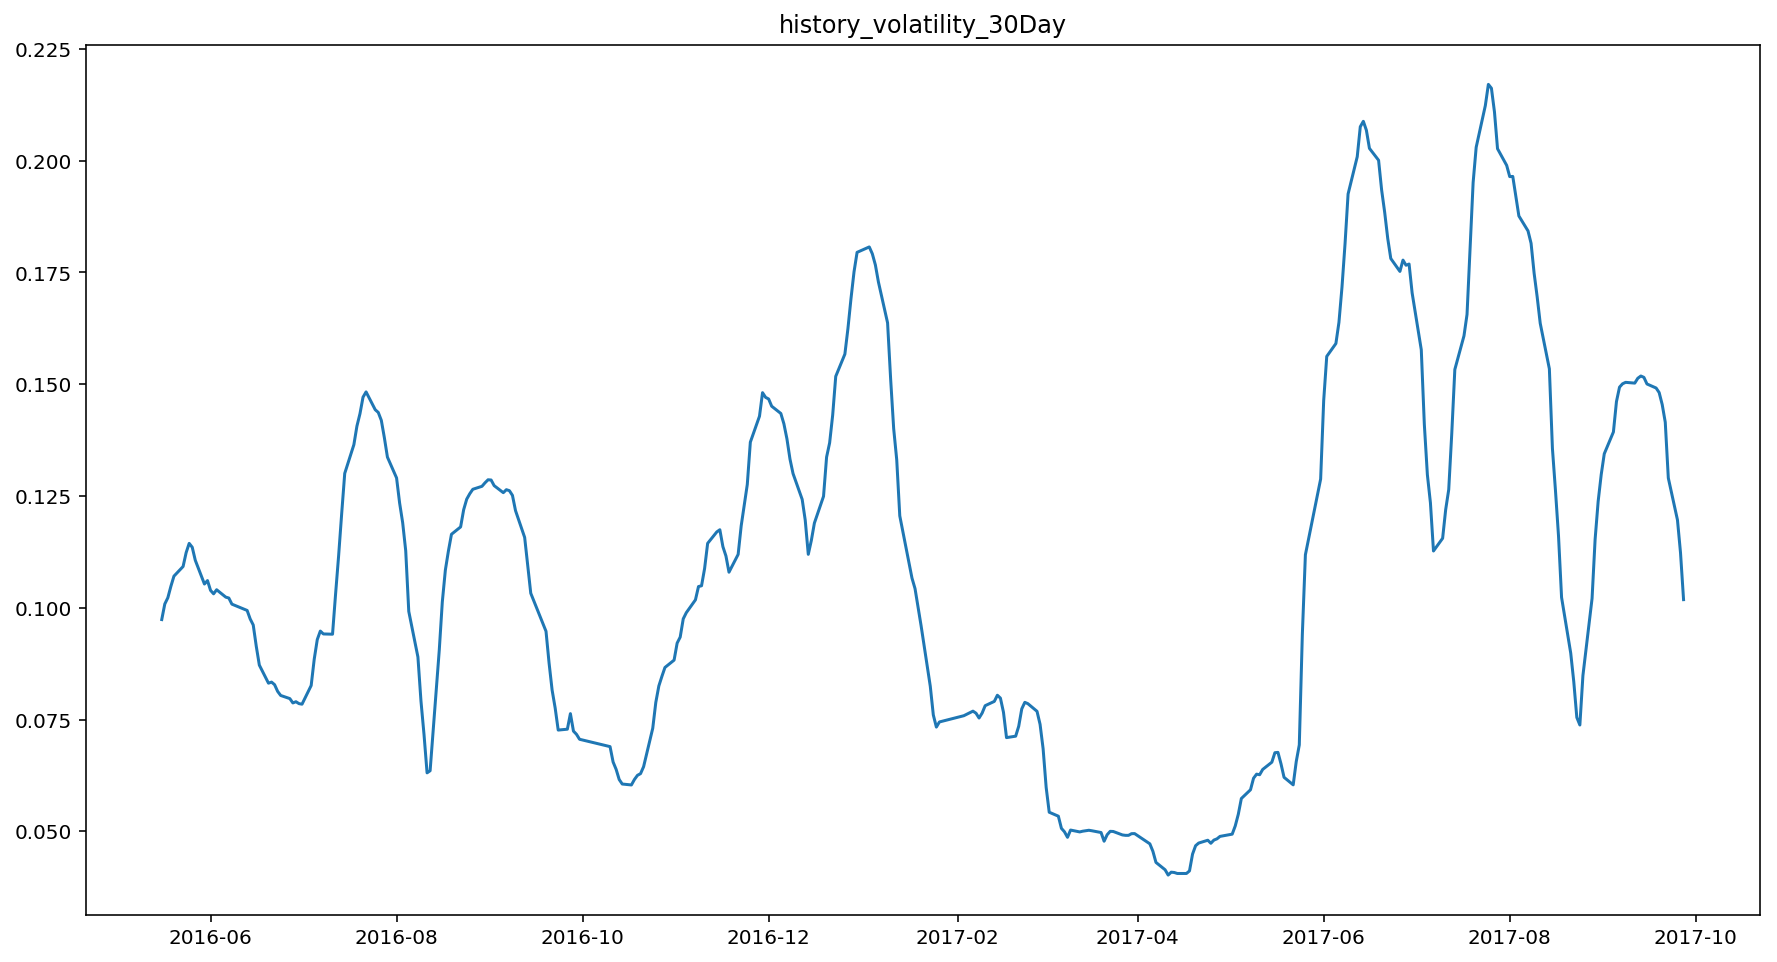

In [17]:
draw_pic(history_volatility_30, 'history_volatility_30Day')

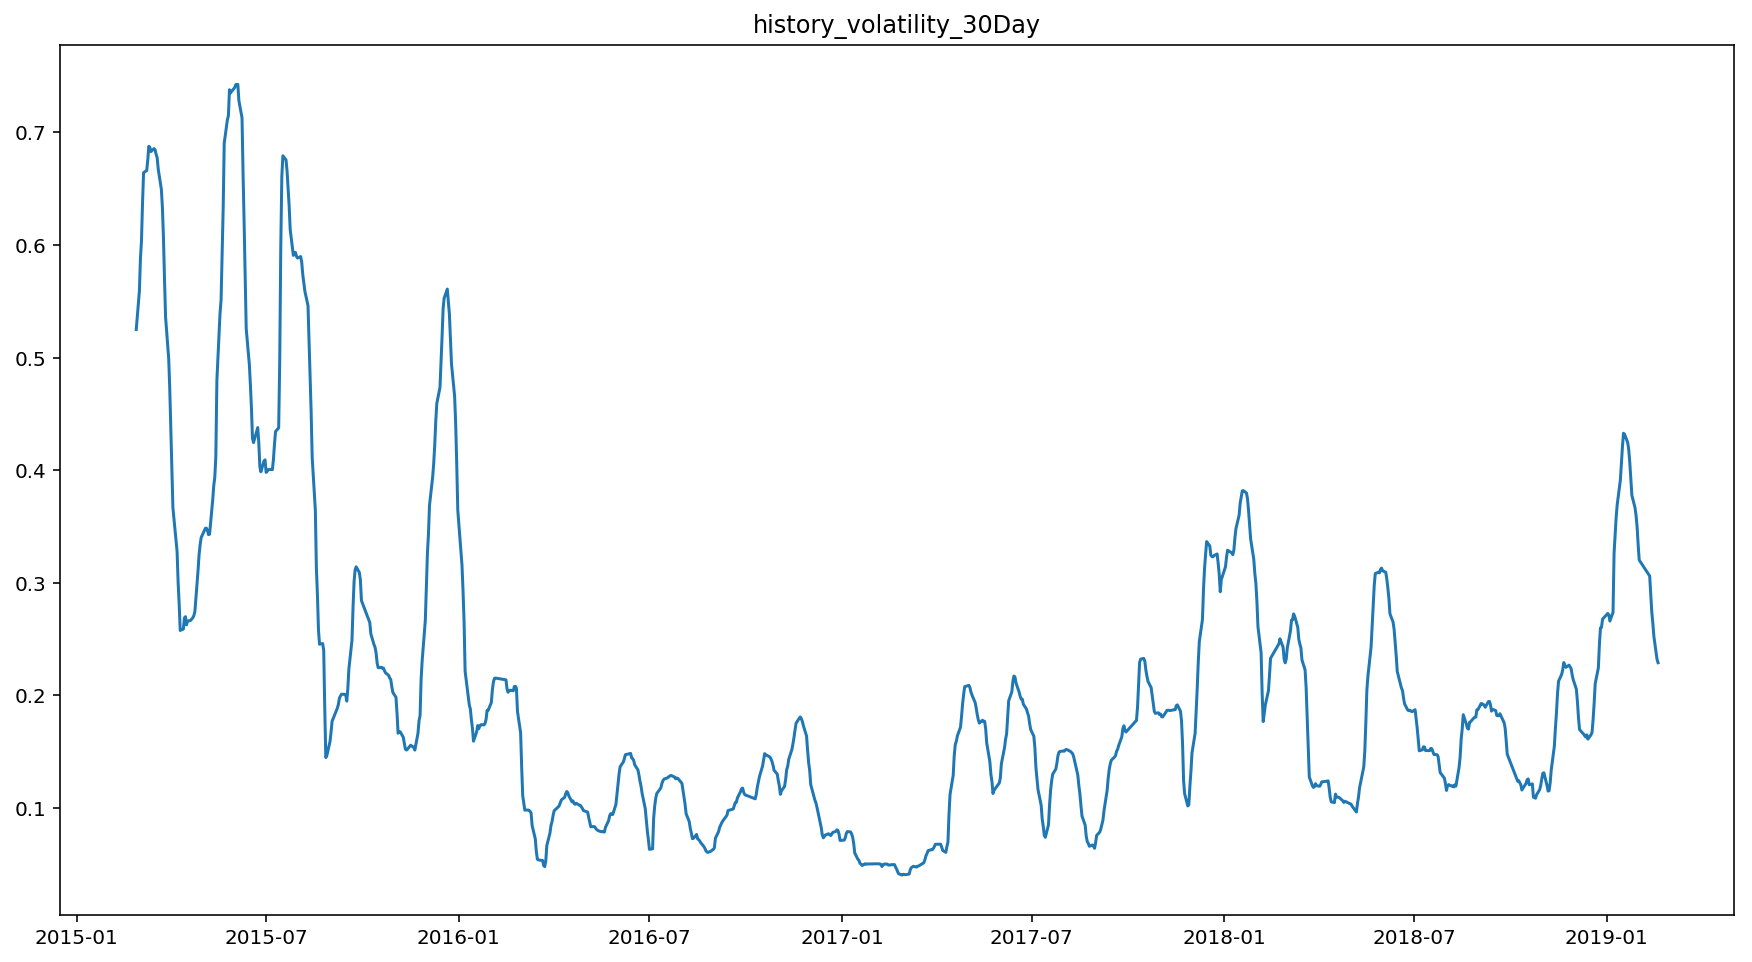

In [18]:
draw_pic(history_volatility(data['close'], 30), 'history_volatility_30Day')

## have a see

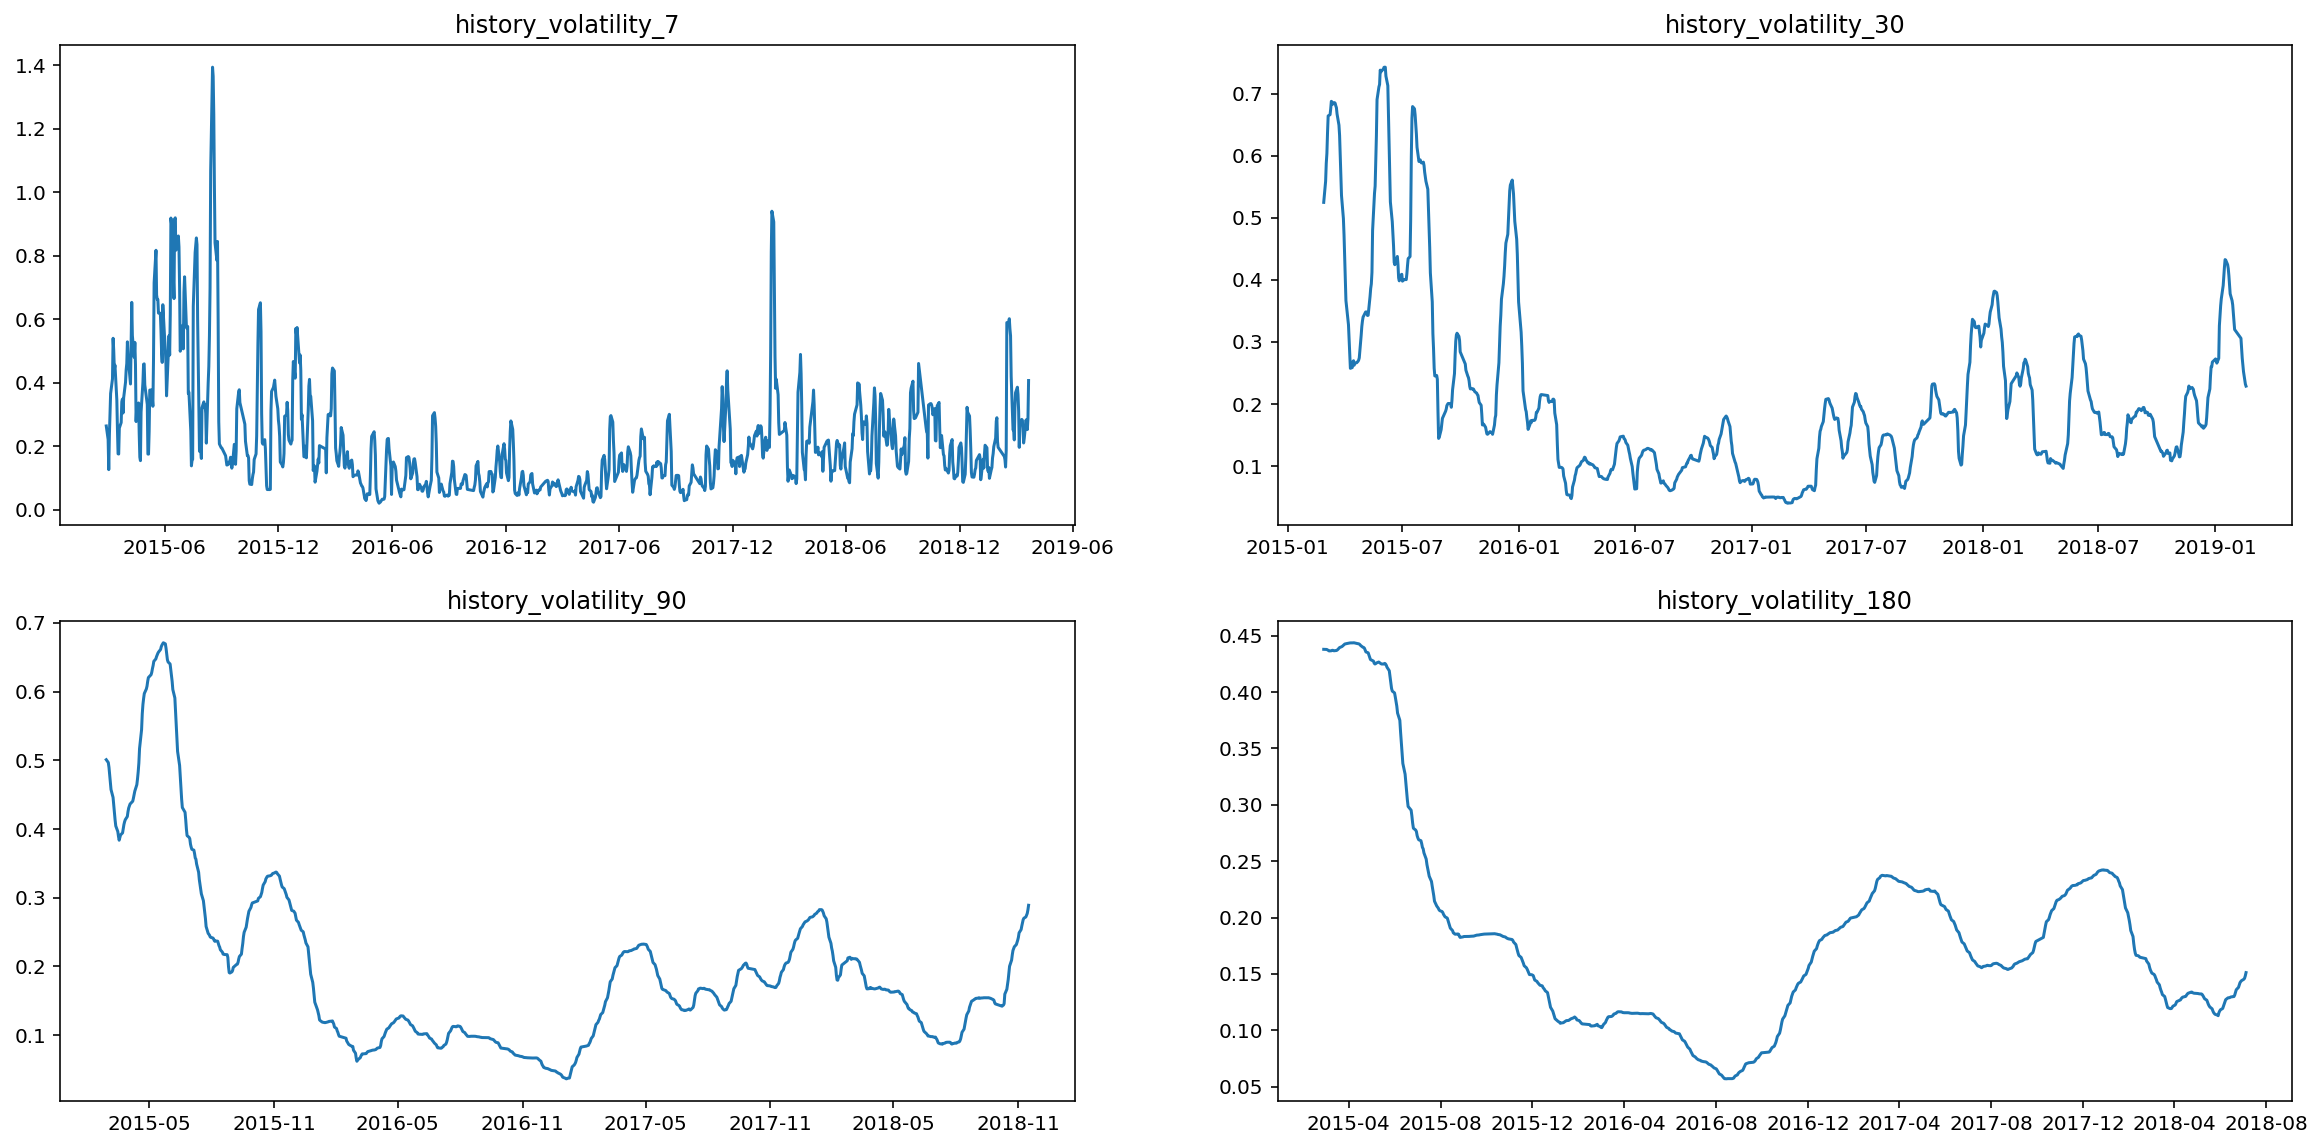

In [19]:
peiords_list = [7, 30, 90, 180]
col = 3
rows = 2

plt.figure(figsize=(20,15))
for i in range(0, 4):
    plt.subplot(3,2,i+1)
    plt.plot(history_volatility(data['close'], peiords_list[i]))
    plt.title('history_volatility_'+ str(peiords_list[i]))

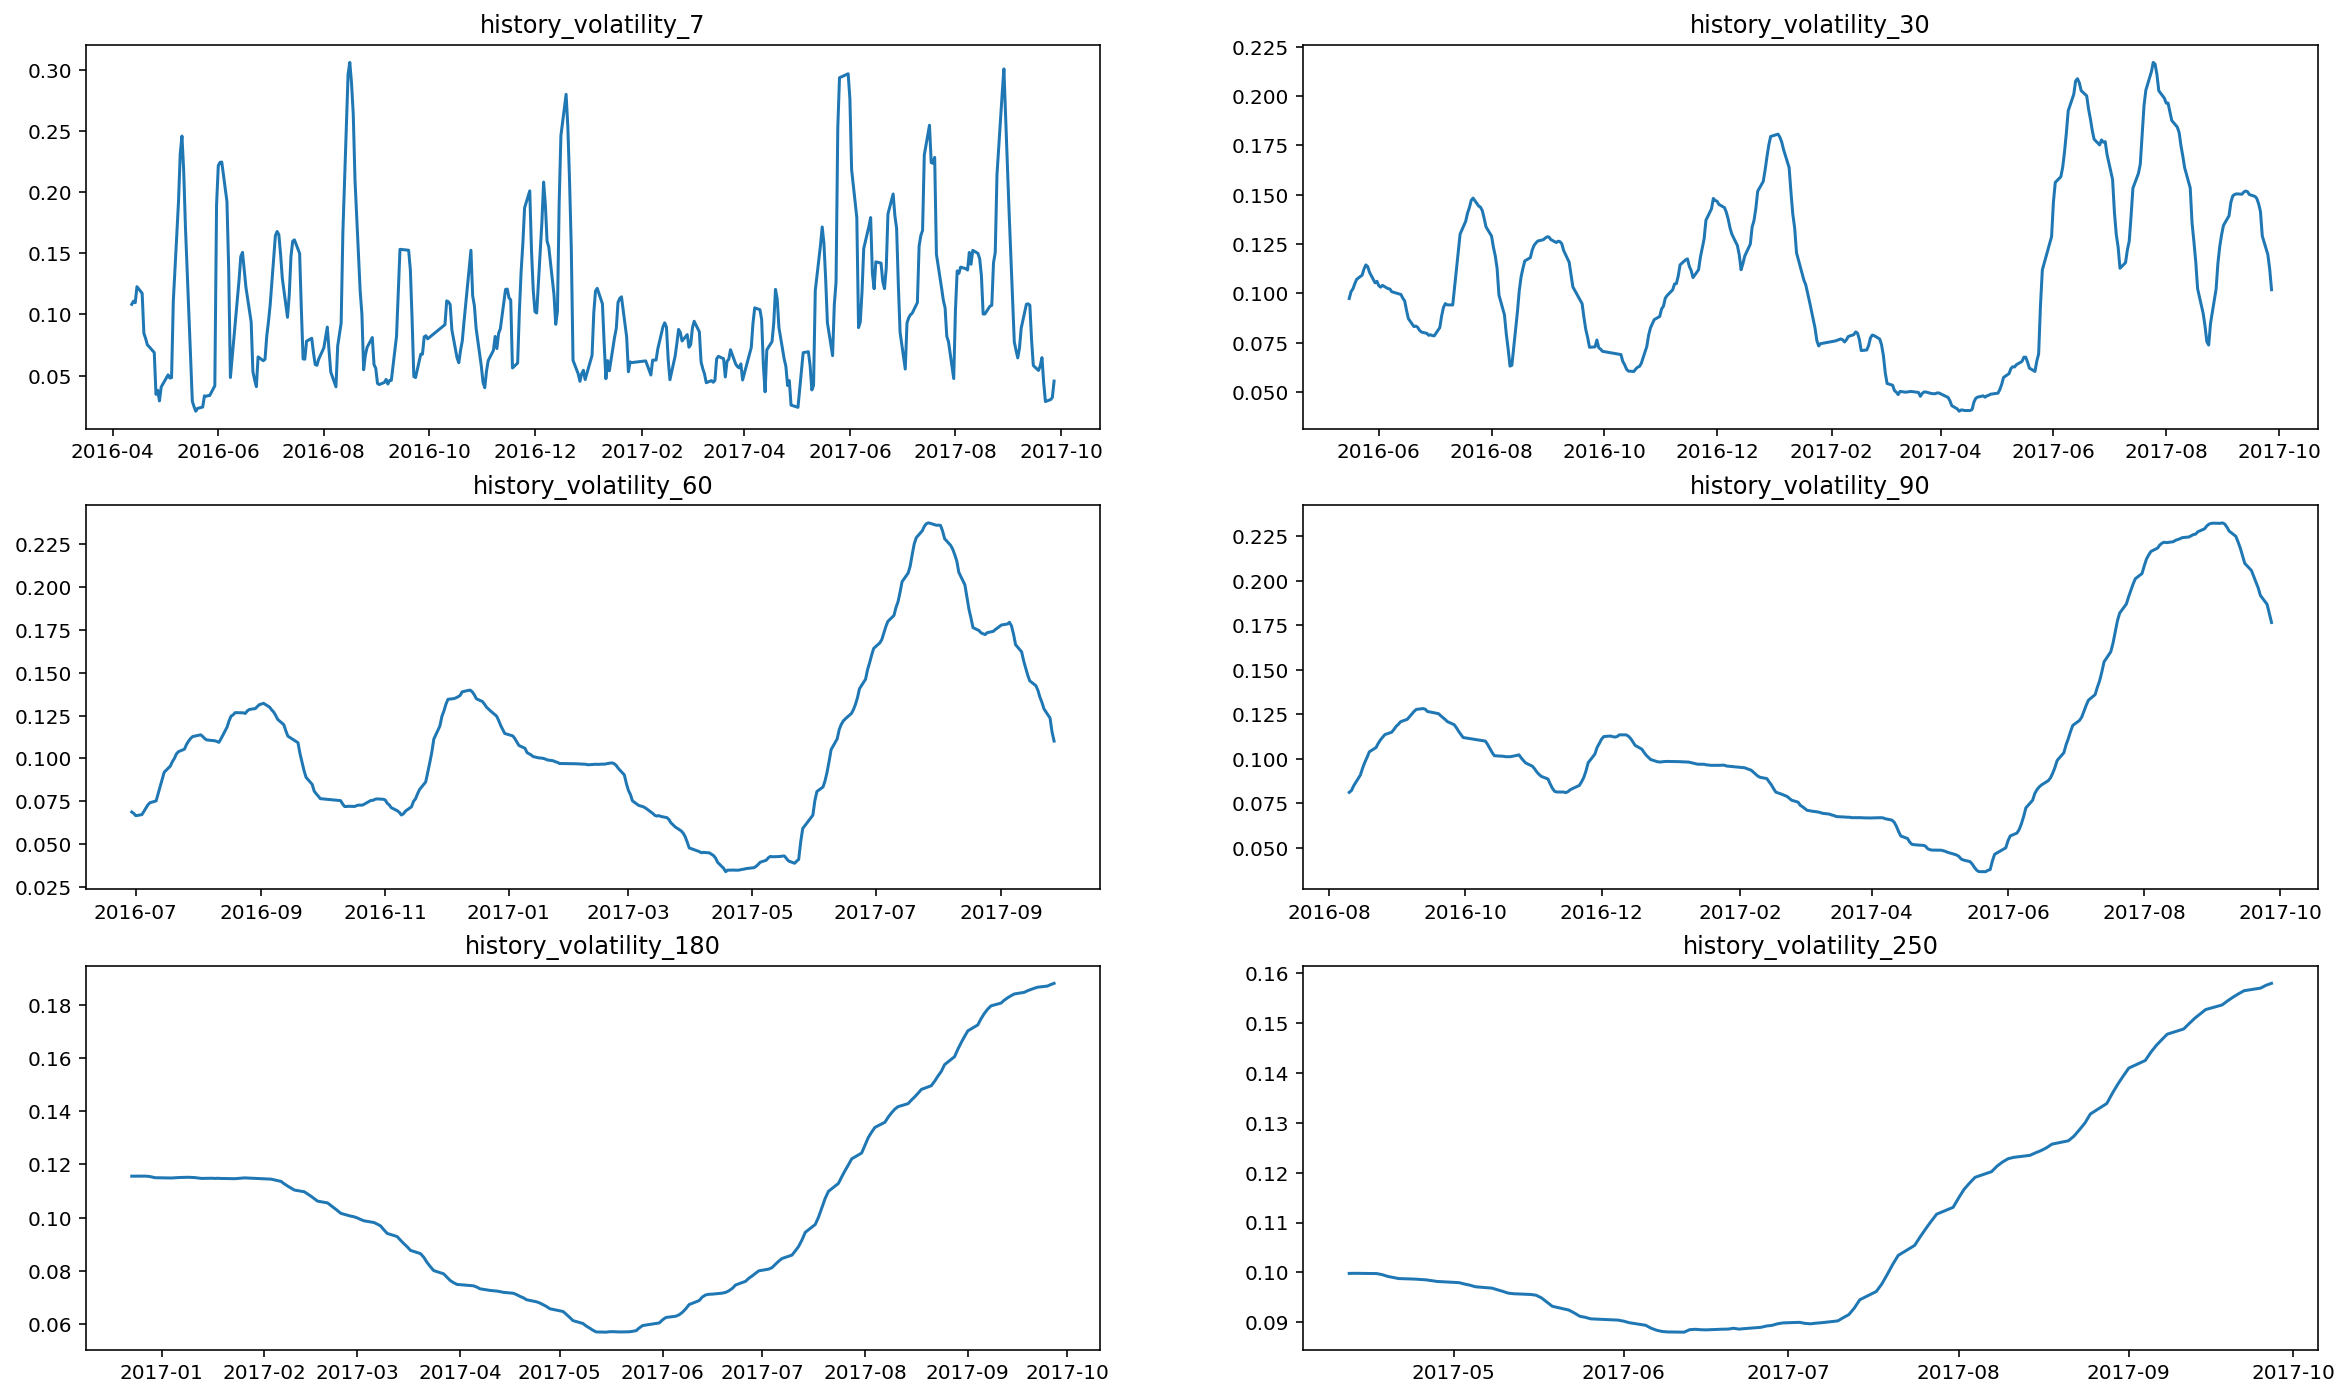

In [20]:
peiords_list = [7, 30, 60, 90, 180, 250]
col = 3
rows = 2

plt.figure(figsize=(20,12))
for i in range(0, 6):
    plt.subplot(3,2,i+1)
    plt.plot(history_volatility(underlying_asset_trade['close'], peiords_list[i]))
    plt.title('history_volatility_'+ str(peiords_list[i]))

# Get Risk Free Rate (Shibor) Data

In [21]:
def get_risk_free_rate_data():
    #pro = ts.pro_api()
    df = pro.shibor(start_date=begin_date , end_date=end_date, fields='date,3m,1y,6m')
    df['ccr'] = np.log(1 + df['1y']/100)
    col_to_date_and_as_index(df, 'date')
    return df

risk_free_rate = get_risk_free_rate_data()
risk_free_rate

,date,3m,6m,1y,ccr
date,,,,,
2017-09-27,2017-09-27,4.3565,4.3875,4.4048,0.043105
2017-09-26,2017-09-26,4.3558,4.3875,4.4040,0.043098
2017-09-25,2017-09-25,4.3578,4.3884,4.4033,0.043091
2017-09-22,2017-09-22,4.3611,4.3900,4.4028,0.043086
2017-09-21,2017-09-21,4.3675,4.3919,4.4031,0.043089
2017-09-20,2017-09-20,4.3670,4.3918,4.4040,0.043098
2017-09-19,2017-09-19,4.3638,4.3903,4.4032,0.043090
2017-09-18,2017-09-18,4.3643,4.3874,4.4012,0.043071
2017-09-15,2017-09-15,4.3647,4.3870,4.4015,0.043074


## have a look

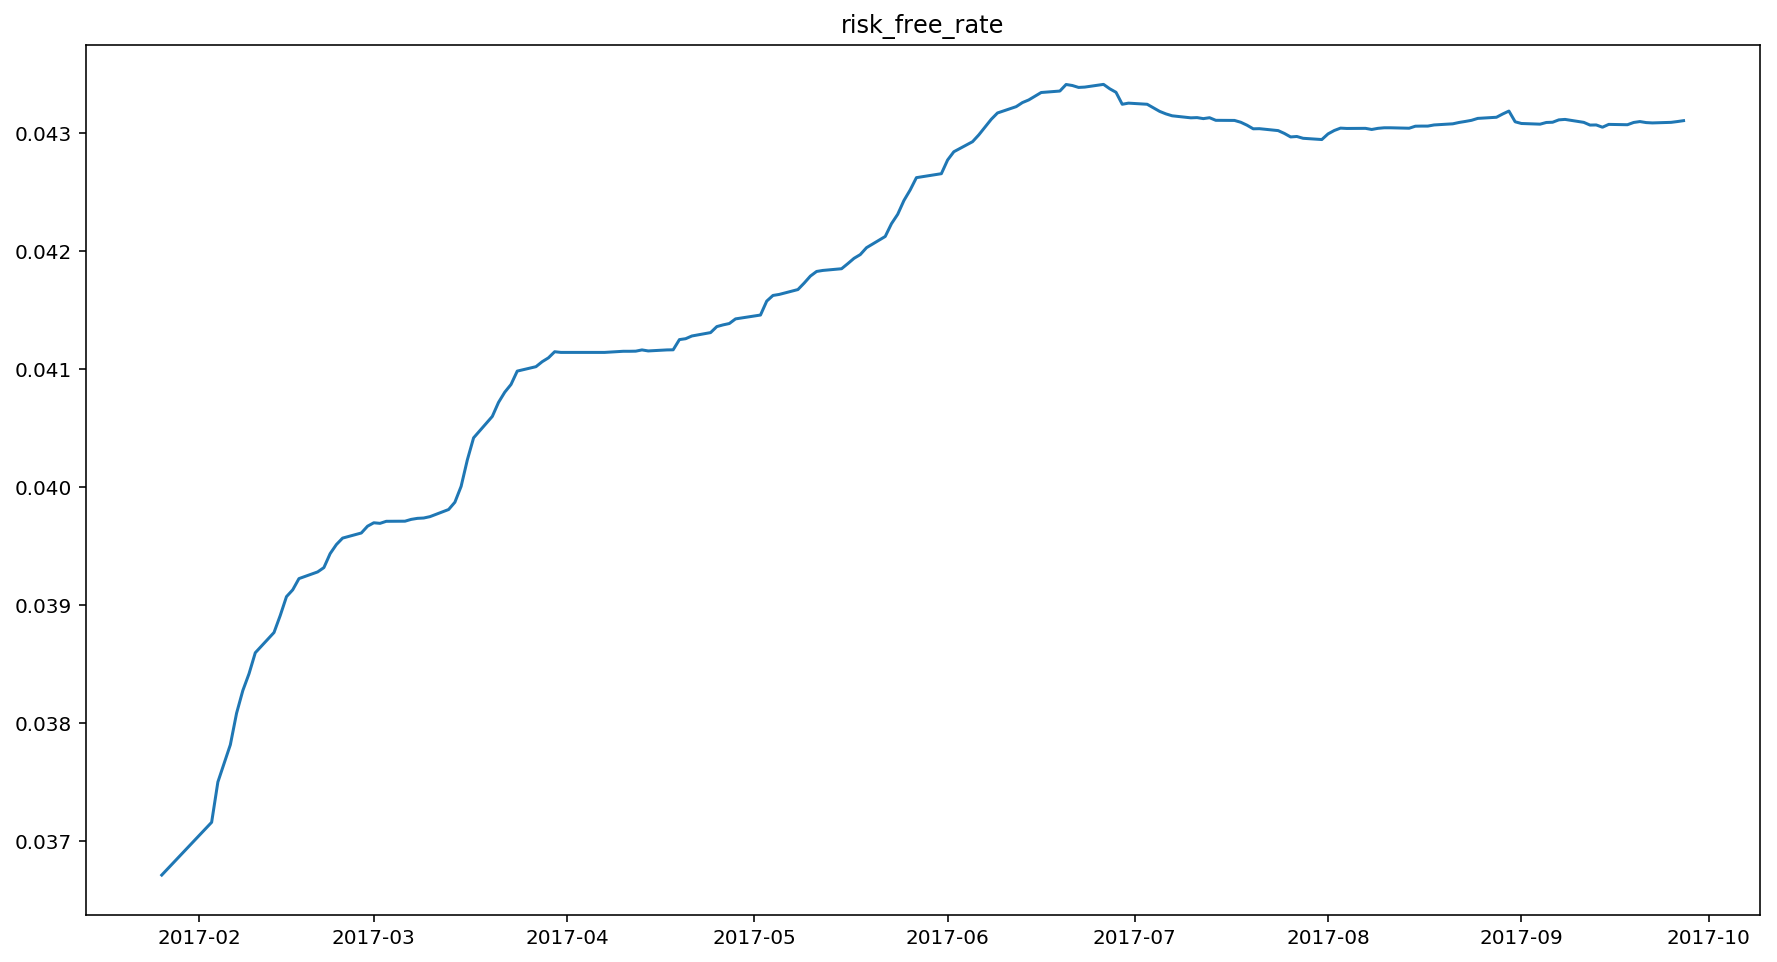

In [22]:
draw_pic(risk_free_rate['ccr'], "risk_free_rate")

### get img for ppt

In [23]:
def get_risk_free_rate_data_test():
    #pro = ts.pro_api()
    df = pro.shibor(start_date='20130101', end_date='20190401', fields='date,3m,1y,6m')
    df['ccr'] = np.log(1 + df['1y']/100)
    col_to_date_and_as_index(df, 'date')
    return df

risk_free_rate_2 = get_risk_free_rate_data_test()

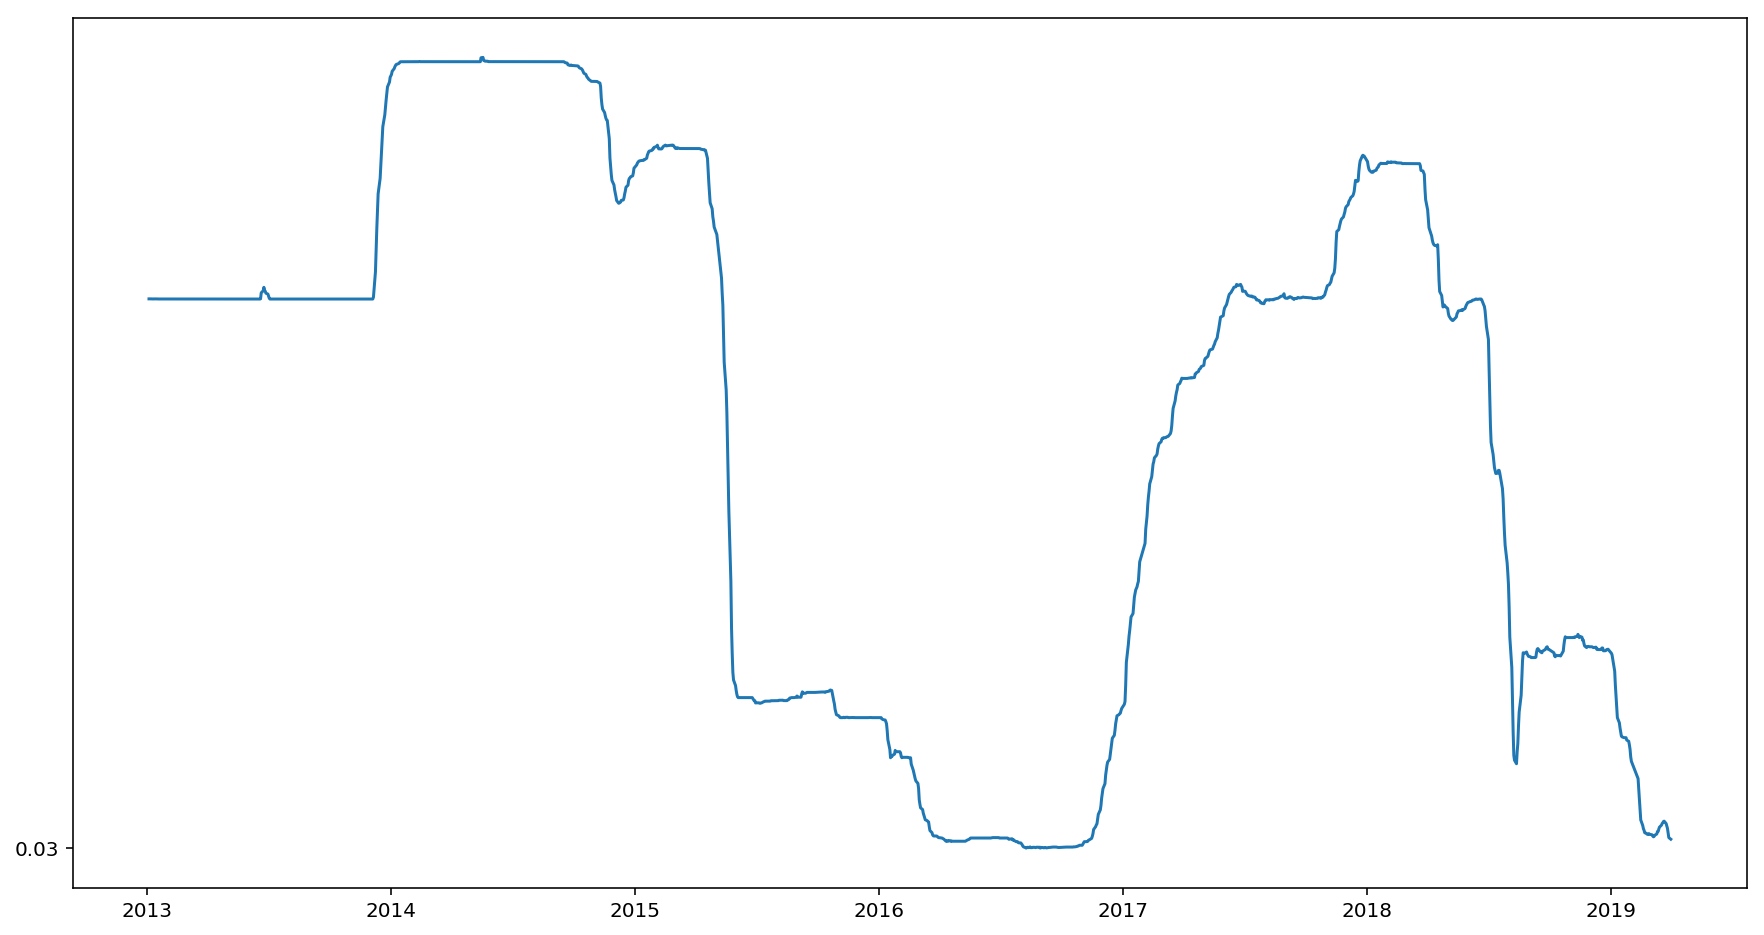

In [35]:
plt.figure(figsize=(15,8))
x = risk_free_rate_2['ccr']
plt.yticks(np.arange(min(x), max(x)+1, 1.0))

plt.plot(risk_free_rate_2['ccr'])

#plt.title("risk_free_rate")

# Construct BS Model

BS_formula.png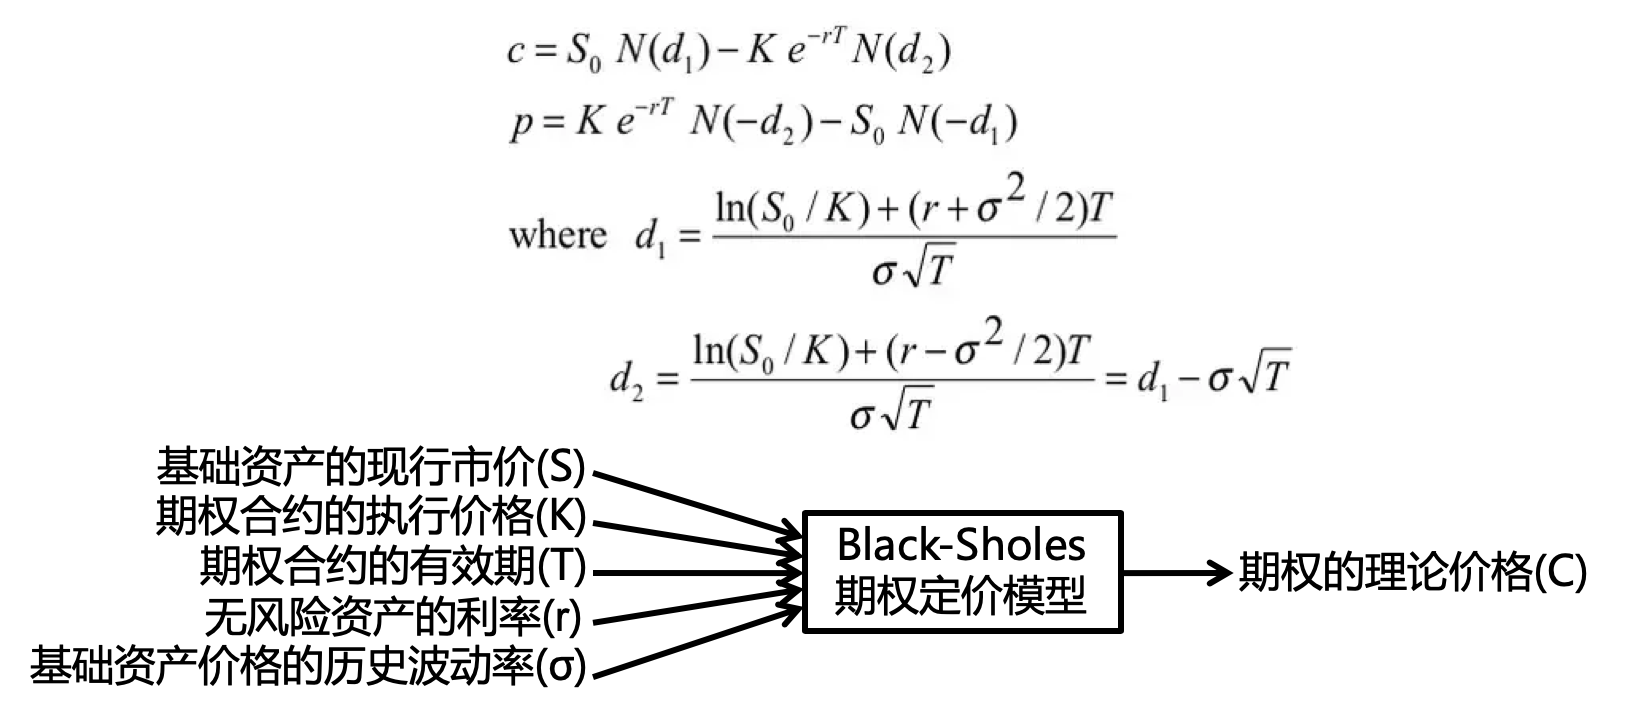

In [25]:
def d1(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))


def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))


def BlackScholes(type, S0, K, r, sigma, T):
    """
    S0  stock price
    K   strike price
    r   continuously compounded risk-free rate:
    sigma   volatility of the stock price per year
    T   time to maturity in trading years

    """
    if type == "C":
        return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, sigma, T)) - S0 * ss.norm.cdf(-d1(S0, K, r, sigma, T))


In [26]:
def construct_BS_summary_table():
    k = option_info['exercise_price'].values[0]
    summary = pd.DataFrame(index=option_trade.index)
    summary['s'] = underlying_asset_trade['close']
    summary['t'] = (
        datetime.strptime(option_info['maturity_date'].values[0], "%Y%m%d") -
        underlying_asset_trade['trade_date']).dt.days / 365.0
    summary['r'] = risk_free_rate['ccr']
    summary['sigma'] = history_volatility(underlying_asset_trade['close'], 90)
    summary['bs_simulate'] = BlackScholes('C', summary['s'], k, summary['r'], summary['sigma'], summary['t'])
    summary['real_price'] = option_trade['close']
    summary = summary.dropna()
    return summary

summary = construct_BS_summary_table()
summary

,s,t,r,sigma,bs_simulate,real_price
trade_date,,,,,,
2017-01-26,2.366,0.668493,0.036714,0.095886,0.148720,0.1433
2017-02-03,2.342,0.646575,0.037161,0.094918,0.128490,0.1345
2017-02-06,2.343,0.638356,0.037818,0.093529,0.128148,0.1309
2017-02-07,2.335,0.635616,0.038085,0.092423,0.121657,0.1236
2017-02-08,2.348,0.632877,0.038277,0.091254,0.130328,0.1280
2017-02-09,2.354,0.630137,0.038420,0.090194,0.134061,0.1368
2017-02-10,2.366,0.627397,0.038597,0.089538,0.142819,0.1421
2017-02-13,2.378,0.619178,0.038769,0.088846,0.151277,0.1427
2017-02-14,2.370,0.616438,0.038913,0.087040,0.143804,0.1353


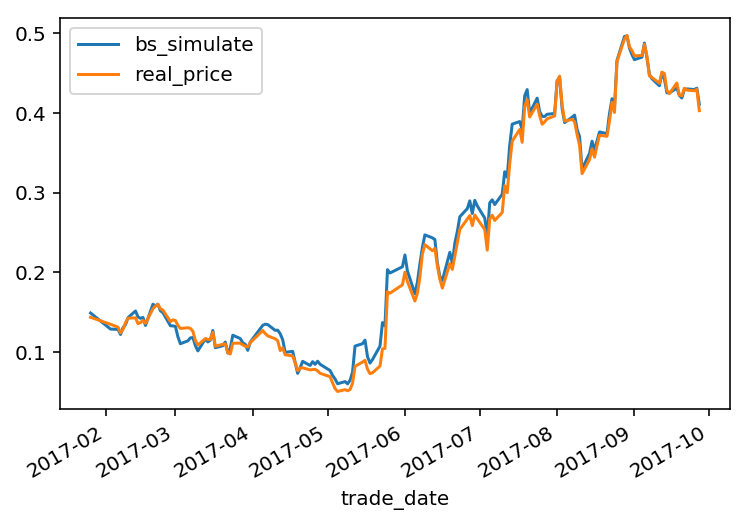

In [27]:
simulate_vs_real = summary[['bs_simulate','real_price']]
simulate_vs_real.plot()
plt.show()

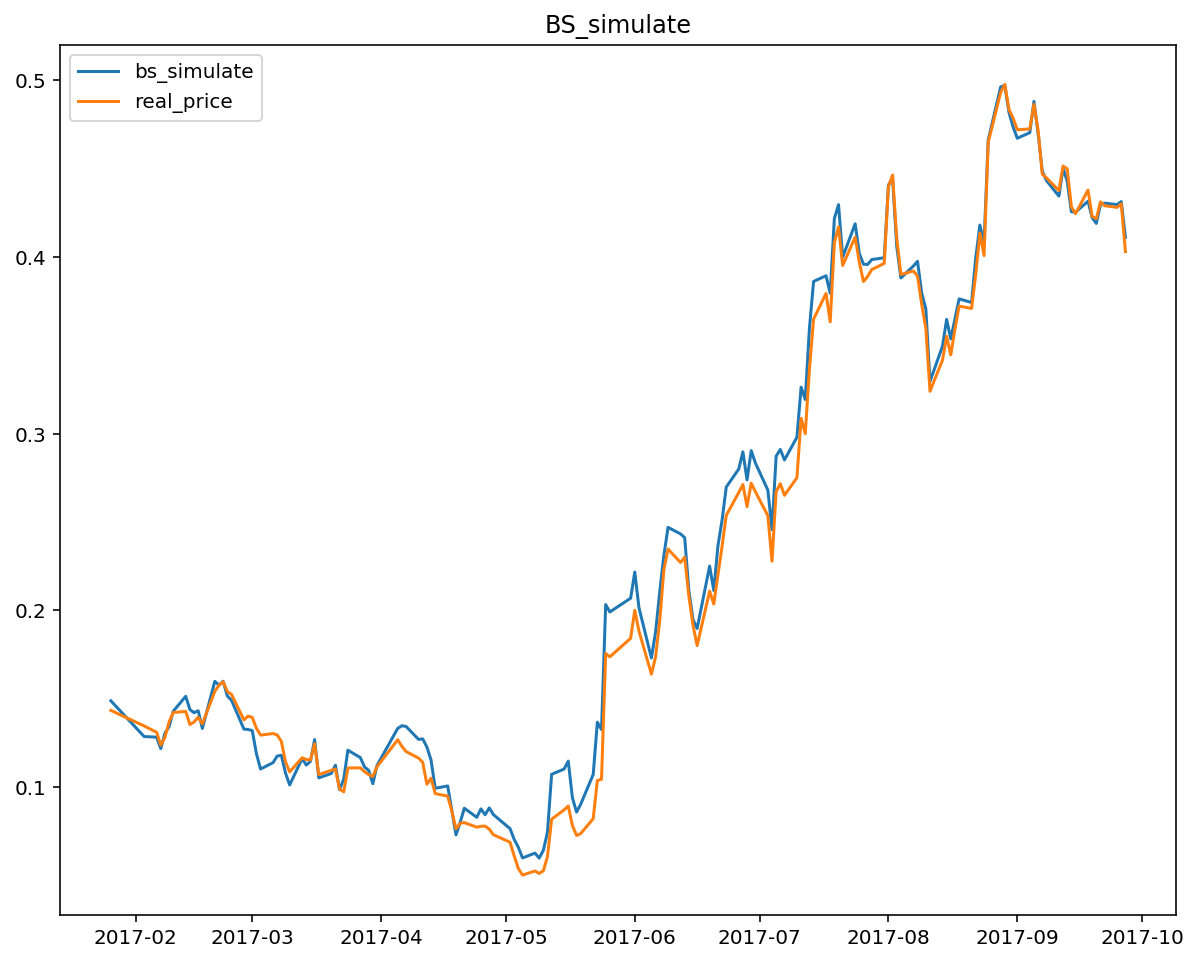

In [33]:

plt.figure(figsize=(10,8))
plt.plot(summary[['bs_simulate','real_price']])
#plt.title("Option Price of BS Simulate & Real Price")
plt.title("BS_simulate")
plt.legend(['bs_simulate','real_price'])
plt.show()

In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
mean_absolute_percentage_error(summary['bs_simulate'],summary['real_price'])

5.583340070952623